# Hearth Attack Prediction

Goal : Build model which classify patients to either 'High Risk of Hearth Attack' category or 'Low Risk of Hearth Attack' Category, also explore which patient parameters strongly affects patients categorization.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the data
data = pd.read_csv('../input/heart-attack-analysis-prediction-dataset/heart.csv')
data.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# About data:

About data set
The "output" field refers to the presence of heart disease in the patient. <br>
It is integer valued 0 = no/less chance of heart attack and 1 = more chance of heart attack<br>

Attribute Information<br>
1) age n<br>
2) sex:<br>
&emsp;0: female<br>
    &emsp;1: male<br>
3) cp - chest pain type (4 values):<br>
    &emsp;1: typical angina<br>
    &emsp;2: atypical angina<br>
    &emsp;3: non-anginal pain<br>
    &emsp;4: asymptomatic<br>
4) trtbps - resting blood pressure (in mm Hg)<br>
5) chol -  serum cholestoral in mg/dl<br>
6) fbs - fasting blood sugar<br>
    &emsp;0 : >= 120 mg/dl<br>
    &emsp;1 : <= 120 mg/dl<br>
7) restecg - resting electrocardiographic results (values 0,1,2)<br>
    &emsp;0: normal<br>
    &emsp;1: having ST-T wave abnormality<br>
    &emsp;2: showing probable or definite left ventricular hypertrophy<br>
8) thalachh - maximum heart rate achieved<br>
9) exng - exercise induced angina:<br>
    &emsp;0: yes<br>
    &emsp;1: no<br>
10) oldpeak - ST depression induced by exercise relative to rest<br>
11) slp - the slope of the peak exercise ST segment<br>
    &emsp;1: upsloping<br>
    &emsp;2: flat<br>
    &emsp;3: downsloping<br>
12) caa - number of major vessels (0-3) colored by flourosopy<br>
13) thall - thalassemia- <br>
    &emsp;0 : normal<br>
    &emsp;1 : fixed defect <br>
    &emsp;2 : reversable defect<br>
14) output: <br>
    &emsp;0 : less chance of heart attack <br>
    &emsp;1 : more chance of heart attack<br

# EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trtbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalachh'}>],
       [<AxesSubplot:title={'center':'exng'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slp'}>,
        <AxesSubplot:title={'center':'caa'}>],
       [<AxesSubplot:title={'center':'thall'}>,
        <AxesSubplot:title={'center':'output'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

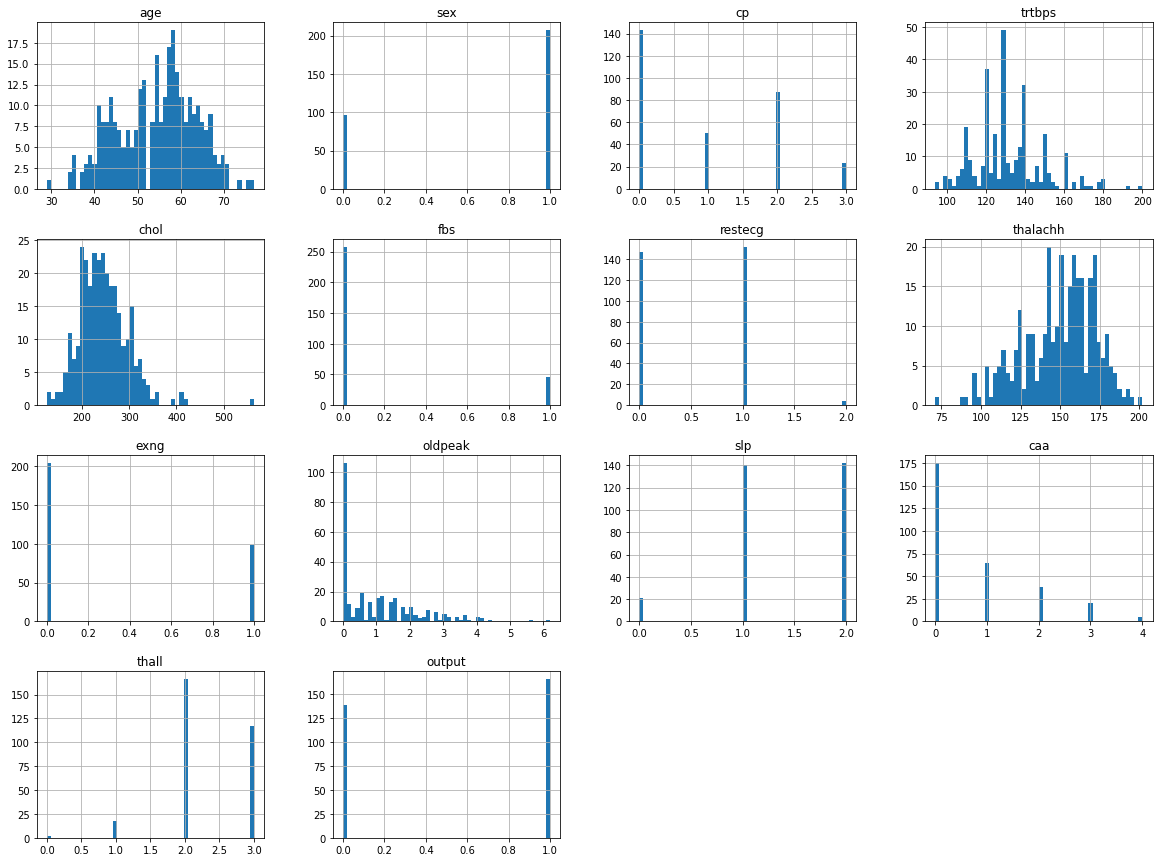

In [4]:
data.hist(bins=50, figsize=(20,15))

In [5]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<AxesSubplot:>

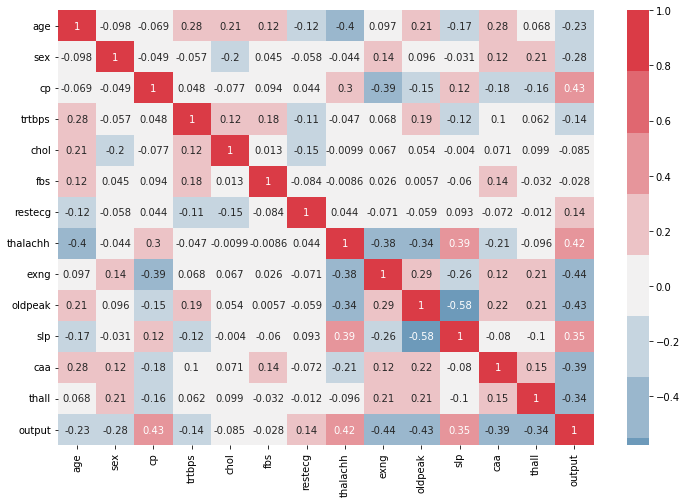

In [6]:
# Visualisation of corellations between columns
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(data.corr(), cmap=sns.diverging_palette(240, 10, n=9), annot = True, ax = ax, center = 0)

In [7]:
# Correlations between target and other columns
corr_matrix['output'].sort_values()

exng       -0.436757
oldpeak    -0.430696
caa        -0.391724
thall      -0.344029
sex        -0.280937
age        -0.225439
trtbps     -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
slp         0.345877
thalachh    0.421741
cp          0.433798
output      1.000000
Name: output, dtype: float64

# Creating test and training data, standarisation

In [8]:
# Separating target column and create train and test sets.
col_names = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall']
X = data[col_names]
y = data['output']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [9]:
# Normalization of data
from sklearn import preprocessing
sca = preprocessing.StandardScaler()
X_train = pd.DataFrame(sca.fit_transform(X_train),columns = col_names)
X_test = pd.DataFrame(sca.fit_transform(X_test),columns = col_names)

# Measure metrics

For measure metrics I choose area under the curve and recall, AUC for comparing models, recall because false negative in Hearth Attack risk categorisation would be fatal.

In [10]:
from sklearn.model_selection import cross_val_score
# Function to print data scores of model
def print_scores (model):
    if str(type(model)) == "<class 'sklearn.model_selection._search.GridSearchCV'>":
        roc = cross_val_score(model.best_estimator_, X_train, y_train, cv=7, scoring ='roc_auc')
        recall = cross_val_score(model.best_estimator_, X_train, y_train, cv=7, scoring ='recall')
        print (model.estimator)
    else:
        print(model)
        roc = cross_val_score(model, X_train, y_train, cv=7, scoring ='roc_auc')
        recall = cross_val_score(model, X_train, y_train, cv=7, scoring ='recall') 
    print ("Scores on training data:")
    print ("ROC AUC : {}".format(roc.mean()))
    print ("Recall : {}".format(recall.mean()))
# Function to print test scores of model
from sklearn import metrics
def print_final_scores (model):
    if str(type(model)) == "<class 'sklearn.model_selection._search.GridSearchCV'>":
        final_predictions = model.best_estimator_.predict(X_test)
        print (model.estimator)
    else: 
        final_predictions = model.predict(X_test)
    roc = metrics.roc_auc_score(final_predictions, y_test)
    recall = metrics.recall_score(final_predictions, y_test)
    print ("Scores on test data:")
    print ("ROC AUC : {}".format(roc))
    print ("Recall : {}".format(recall))

# Random Forest

Because the dataset is relatively small i will use param grid for every model to find optimal parameters and cross-validate to avoid overfitting.

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'class_weight': [None, 'balanced'], 
     'max_features': [5, 6, 7, 8, 10, None], 'bootstrap': [True, False]}]

rnd_clf = RandomForestClassifier(n_estimators = 100)
rnd_clf_grid = GridSearchCV(rnd_clf, param_grid, cv=7, scoring = 'roc_auc', return_train_score=True)
rnd_clf_grid.fit(X_train, y_train)

GridSearchCV(cv=7, estimator=RandomForestClassifier(),
             param_grid=[{'bootstrap': [True, False],
                          'class_weight': [None, 'balanced'],
                          'max_features': [5, 6, 7, 8, 10, None]}],
             return_train_score=True, scoring='roc_auc')

In [12]:
rnd_clf_grid.best_params_

{'bootstrap': True, 'class_weight': 'balanced', 'max_features': 5}

In [13]:
print_scores (rnd_clf_grid)

RandomForestClassifier()
Scores on training data:
ROC AUC : 0.8975145613801077
Recall : 0.830532212885154


In [14]:
print_final_scores(rnd_clf_grid)

RandomForestClassifier()
Scores on test data:
ROC AUC : 0.8039772727272727
Recall : 0.7954545454545454


There is 9 percent disrepency between training data and test data suggesting overfitting, setting min_samples_leaf = 50 for a better generalisation.

In [15]:
rnd_clf = RandomForestClassifier(n_estimators = 200, **rnd_clf_grid.best_params_, min_samples_leaf =50)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_features=5,
                       min_samples_leaf=50, n_estimators=200)

In [16]:
print_scores (rnd_clf)

RandomForestClassifier(class_weight='balanced', max_features=5,
                       min_samples_leaf=50, n_estimators=200)
Scores on training data:
ROC AUC : 0.8768796407451871
Recall : 0.830532212885154


In [17]:
print_final_scores (rnd_clf)

Scores on test data:
ROC AUC : 0.8696264975334742
Recall : 0.8604651162790697


<AxesSubplot:>

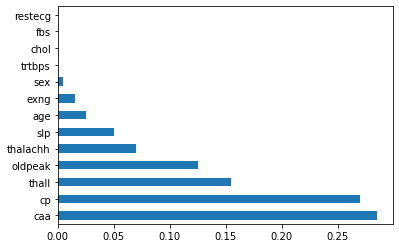

In [18]:
# Let's check which features was most important for the model.
feat_importances = pd.Series(rnd_clf.feature_importances_, index=X.columns)
feat_importances.nlargest(13).plot(kind='barh')

# KNeighbors

In [19]:
from sklearn.neighbors import KNeighborsClassifier
param_grid = [ {'n_neighbors' : [2,3,5,7,10,12,13,14], 'metric' : ['minkowski', 'euclidean', 'manhattan'], 
                'weights':['uniform','distance']}]
knc = KNeighborsClassifier()
knc_grid = GridSearchCV(knc, param_grid, cv=7, scoring = 'roc_auc', return_train_score=True)
knc_grid.fit(X_train, y_train)

GridSearchCV(cv=7, estimator=KNeighborsClassifier(),
             param_grid=[{'metric': ['minkowski', 'euclidean', 'manhattan'],
                          'n_neighbors': [2, 3, 5, 7, 10, 12, 13, 14],
                          'weights': ['uniform', 'distance']}],
             return_train_score=True, scoring='roc_auc')

In [20]:
knc_grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'distance'}

In [21]:
print_scores (knc_grid)

KNeighborsClassifier()
Scores on training data:
ROC AUC : 0.911998132586368
Recall : 0.8870214752567694


In [22]:
print_final_scores(knc_grid)

KNeighborsClassifier()
Scores on test data:
ROC AUC : 0.8849431818181819
Recall : 0.8636363636363636


# SVC

In [23]:
from sklearn.svm import SVC
param_grid = [ {'class_weight' : [None, 'balanced'], 
                'decision_function_shape':['ovr','ovo'], 'tol' : [0.001, 0.002]}]
svc = SVC(probability = True)
svc_grid = GridSearchCV(svc, param_grid, cv=7, scoring = 'roc_auc', return_train_score=True)
svc_grid.fit(X_train, y_train)

GridSearchCV(cv=7, estimator=SVC(probability=True),
             param_grid=[{'class_weight': [None, 'balanced'],
                          'decision_function_shape': ['ovr', 'ovo'],
                          'tol': [0.001, 0.002]}],
             return_train_score=True, scoring='roc_auc')

In [24]:
svc_grid.best_params_

{'class_weight': 'balanced', 'decision_function_shape': 'ovr', 'tol': 0.001}

In [25]:
print_scores (svc_grid)

SVC(probability=True)
Scores on training data:
ROC AUC : 0.8808345560446401
Recall : 0.7829131652661064


In [26]:
print_final_scores (svc_grid)

SVC(probability=True)
Scores on test data:
ROC AUC : 0.8816526610644257
Recall : 0.8809523809523809


All three classifier above was quite good achieving AUC value on test data around 0.88. I'll create Voting classifier which will combine all three models above.

# Voting Classifier

In [27]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(
estimators = [('Random_forest', rnd_clf), ("KNeighbours", knc_grid.best_estimator_), 
              ("SVC", svc_grid.best_estimator_)], voting = 'soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('Random_forest',
                              RandomForestClassifier(class_weight='balanced',
                                                     max_features=5,
                                                     min_samples_leaf=50,
                                                     n_estimators=200)),
                             ('KNeighbours',
                              KNeighborsClassifier(metric='manhattan',
                                                   n_neighbors=13,
                                                   weights='distance')),
                             ('SVC',
                              SVC(class_weight='balanced', probability=True))],
                 voting='soft')

In [28]:
print_scores (voting_clf)

VotingClassifier(estimators=[('Random_forest',
                              RandomForestClassifier(class_weight='balanced',
                                                     max_features=5,
                                                     min_samples_leaf=50,
                                                     n_estimators=200)),
                             ('KNeighbours',
                              KNeighborsClassifier(metric='manhattan',
                                                   n_neighbors=13,
                                                   weights='distance')),
                             ('SVC',
                              SVC(class_weight='balanced', probability=True))],
                 voting='soft')
Scores on training data:
ROC AUC : 0.9079164999333067
Recall : 0.8706816059757239


In [29]:
print_final_scores(voting_clf)

Scores on test data:
ROC AUC : 0.8849431818181819
Recall : 0.8636363636363636


Voting classifier achieve scores exactly like KNeighbours suggesting that this classifier was the best predictor for every data point in this data set.